In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)  # 모든 행 출력
pd.set_option('display.max_columns', None)  # 모든 열 출력
pd.set_option('display.max_colwidth', None)
data=pd.read_csv("data_final.csv",encoding='utf-8')

In [3]:
data.columns

Index(['Unnamed: 0', 'nation', 'action', 'animation', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'history&war', 'horror',
       'music & musical', 'romance', 'sf', 'sport', 'thriller', 'Country',
       'Official Language', 'Population', '2023 GDP $', 'Log GDP per capita',
       'Happiness', 'Ethnic_Diversity', 'Linguistic_Diversity ',
       'Religious Diversity ', 'Leisure and Personal Care Time (hours)',
       'filtered_internet_dataValue', 'christians_ratio', 'muslims_ratio',
       'hindus_ratio', 'buddhists_ratio', 'folkReligions_ratio', 'jews_ratio',
       'other_ratio', 'unaffiliated_ratio', 'made_ratio'],
      dtype='object')

Best parameters: {'kmeans__n_clusters': 4, 'umap__min_dist': 0.0, 'umap__n_neighbors': 5}

c:\Users\rosie\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\rosie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score: 0.5662
Cluster 0: ['Austria', 'Czech Republic', 'Germany', 'Spain', 'France', 'Greece', 'Hungary', 'Italy', 'Poland', 'Portugal', 'Slovak Republic', 'Turkey']
Cluster 1: ['Australia', 'Belgium', 'Canada', 'Switzerland', 'Estonia', 'Japan', 'Korea', 'Netherlands', 'New Zealand', 'United Kingdom', 'United States']
Cluster 2: ['Chile', 'Colombia', 'Costa Rica', 'Israel', 'Iceland', 'Lithuania', 'Luxembourg', 'Latvia', 'Mexico', 'Slovenia']
Cluster 3: ['Denmark', 'Finland', 'Ireland', 'Norway', 'Sweden']


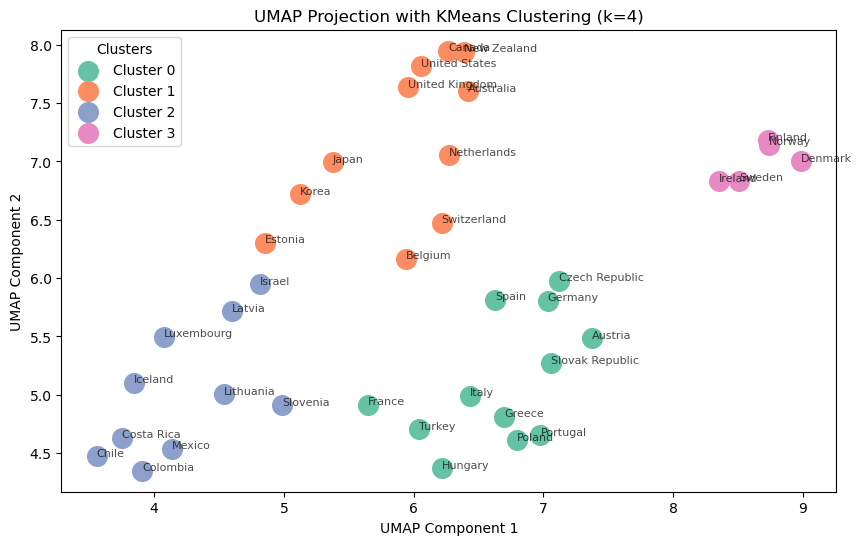

c:\Users\rosie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\rosie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\rosie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\rosie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

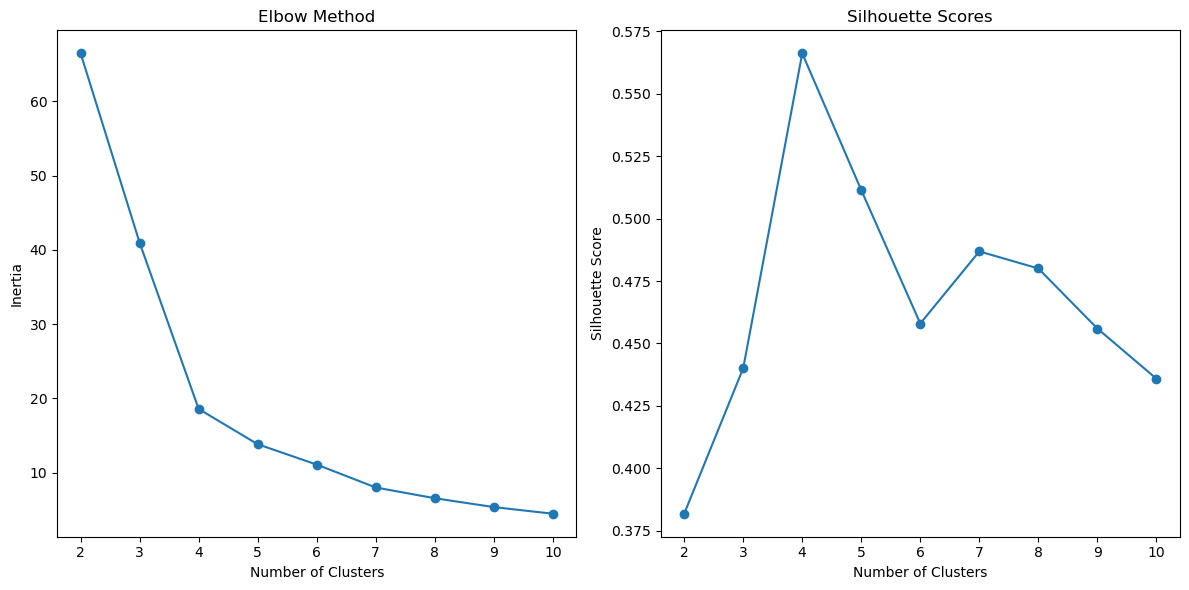

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
data = pd.read_csv("data_final.csv", encoding='utf-8')

# 데이터 준비
X = data.drop(['Unnamed: 0', 'music & musical', 'documentary',
               'Log GDP per capita', 'nation', 'Country', 'Official Language', 'Population'], axis=1)

# 결측치 처리
X.fillna(X.mean(), inplace=True)

# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# UMAP으로 2차원으로 축소
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.0, random_state=42)
umap_components = umap_model.fit_transform(X_scaled)

# KMeans 클러스터링
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(umap_components)

# 실루엣 계수 계산
silhouette_avg = silhouette_score(umap_components, cluster_labels)
print(f'Silhouette Score: {silhouette_avg:.4f}')

# Country 정보를 클러스터 레이블과 결합
data['Cluster'] = cluster_labels
data['UMAP_1'] = umap_components[:, 0]
data['UMAP_2'] = umap_components[:, 1]

# 클러스터별 Country 출력
for cluster in range(4):
    countries_in_cluster = data[data['Cluster'] == cluster]['Country'].tolist()
    print(f'Cluster {cluster}: {countries_in_cluster}')

# 클러스터링 결과 시각화
plt.figure(figsize=(10,6))

# Seaborn의 색상 팔레트 사용
palette = sns.color_palette("Set2", n_colors=4)

# 클러스터별 점 그리기
for cluster in range(4):
    plt.scatter(umap_components[cluster_labels == cluster, 0], 
                umap_components[cluster_labels == cluster, 1], 
                color=palette[cluster], 
                label=f'Cluster {cluster}', 
                s=200)

# Country 이름 표시
for i, country in enumerate(data['Country']):
    plt.annotate(country, (umap_components[i, 0], umap_components[i, 1]), fontsize=8, alpha=0.7)

plt.title('UMAP Projection with KMeans Clustering (k=4)')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')

# 범례 추가
plt.legend(title='Clusters')
plt.show()

# 엘보우 방법을 위한 KMeans 클러스터 수 범위 설정
inertia = []
silhouette_scores = []

# 클러스터 수를 2부터 10까지 변화시키며 평가
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(umap_components)
    
    # 엘보우 계수 (inertia)
    inertia.append(kmeans.inertia_)
    
    # 클러스터 레이블 예측
    cluster_labels = kmeans.predict(umap_components)
    
    # 실루엣 계수 계산
    silhouette_avg = silhouette_score(umap_components, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# 엘보우 방법 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# 실루엣 계수 시각화
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()



In [5]:

# 클러스터 정의
clusters = {
    'Cluster_0': ['Austria', 'Czech Republic', 'Germany', 'Spain', 'France', 'Greece', 
                  'Hungary', 'Italy', 'Poland', 'Portugal', 'Slovak Republic', 'Turkey'],
    'Cluster_1': ['Australia', 'Belgium', 'Canada', 'Switzerland', 'Estonia', 'Japan', 
                  'Korea', 'Netherlands', 'New Zealand', 'United Kingdom', 'United States'],
    'Cluster_2': ['Chile', 'Colombia', 'Costa Rica', 'Israel', 'Iceland', 'Lithuania', 
                  'Luxembourg', 'Latvia', 'Mexico', 'Slovenia'],
    'Cluster_3': ['Denmark', 'Finland', 'Ireland', 'Norway', 'Sweden']
}



# 클러스터별 데이터프레임 생성
cluster_0_df = data[data['Country'].isin(clusters['Cluster_0'])]
cluster_1_df = data[data['Country'].isin(clusters['Cluster_1'])]
cluster_2_df = data[data['Country'].isin(clusters['Cluster_2'])]
cluster_3_df = data[data['Country'].isin(clusters['Cluster_3'])]


In [9]:
cluster_3_df['Country']

10    Denmark
13    Finland
17    Ireland
28     Norway
32     Sweden
Name: Country, dtype: object

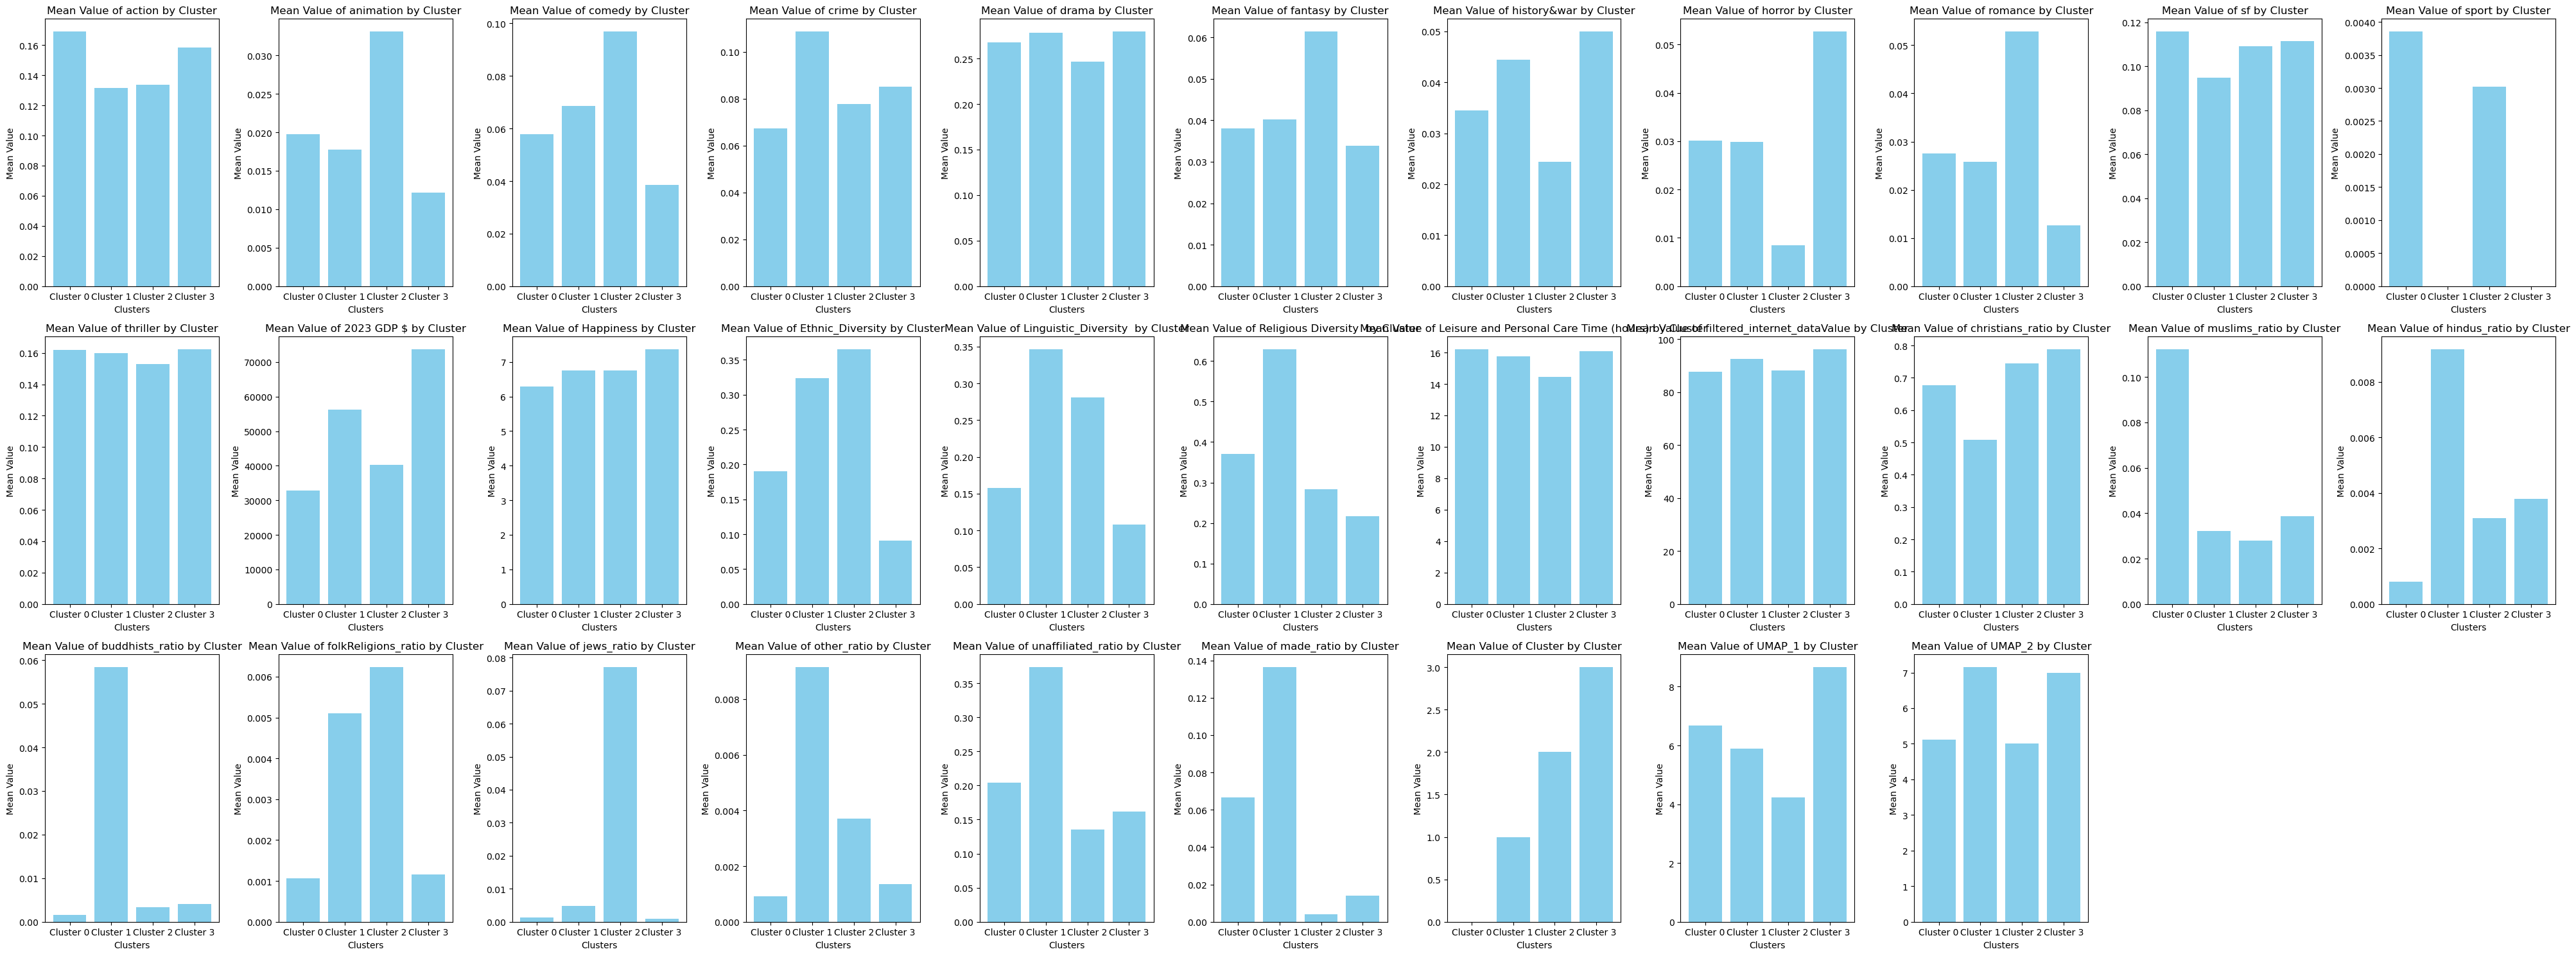

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터프레임 리스트
dataframes = [cluster_0_df, cluster_1_df, cluster_2_df, cluster_3_df]

# 드롭할 컬럼 이름 리스트
columns_to_exclude = ['Unnamed: 0', 'music & musical', 'documentary',
                       'Log GDP per capita', 'nation', 'Country', 'Official Language', 'Population']

# 드롭할 컬럼 제거 및 수치형 변수만 남기기
numeric_dfs = [df.drop(columns=columns_to_exclude, errors='ignore').select_dtypes(include='number') for df in dataframes]

# 평균값 계산
mean_values = [df.mean() for df in numeric_dfs]
mean_df = pd.DataFrame(mean_values, index=[f'Cluster {i}' for i in range(len(mean_values))])

# 서브플롯 설정
num_columns = mean_df.shape[1]
num_rows = int(np.ceil(num_columns / 11))  # 행 수 계산 (6열로 변경)
fig, axes = plt.subplots(nrows=num_rows, ncols=11, figsize=(40, 5 * num_rows))  # ncols를 6으로 설정

# 각 컬럼에 대해 서브플롯 생성
for i, column in enumerate(mean_df.columns):
    ax = axes[i // 11, i % 11]  # 행과 열 인덱스 계산
    ax.bar(mean_df.index, mean_df[column], color='skyblue')
    ax.set_title(f'Mean Value of {column} by Cluster')
    ax.set_xlabel('Clusters')
    ax.set_ylabel('Mean Value')
    ax.set_xticks(mean_df.index)
    ax.set_xticklabels(mean_df.index, rotation=0)

# 남은 서브플롯 비우기
for j in range(i + 1, num_rows * 11):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


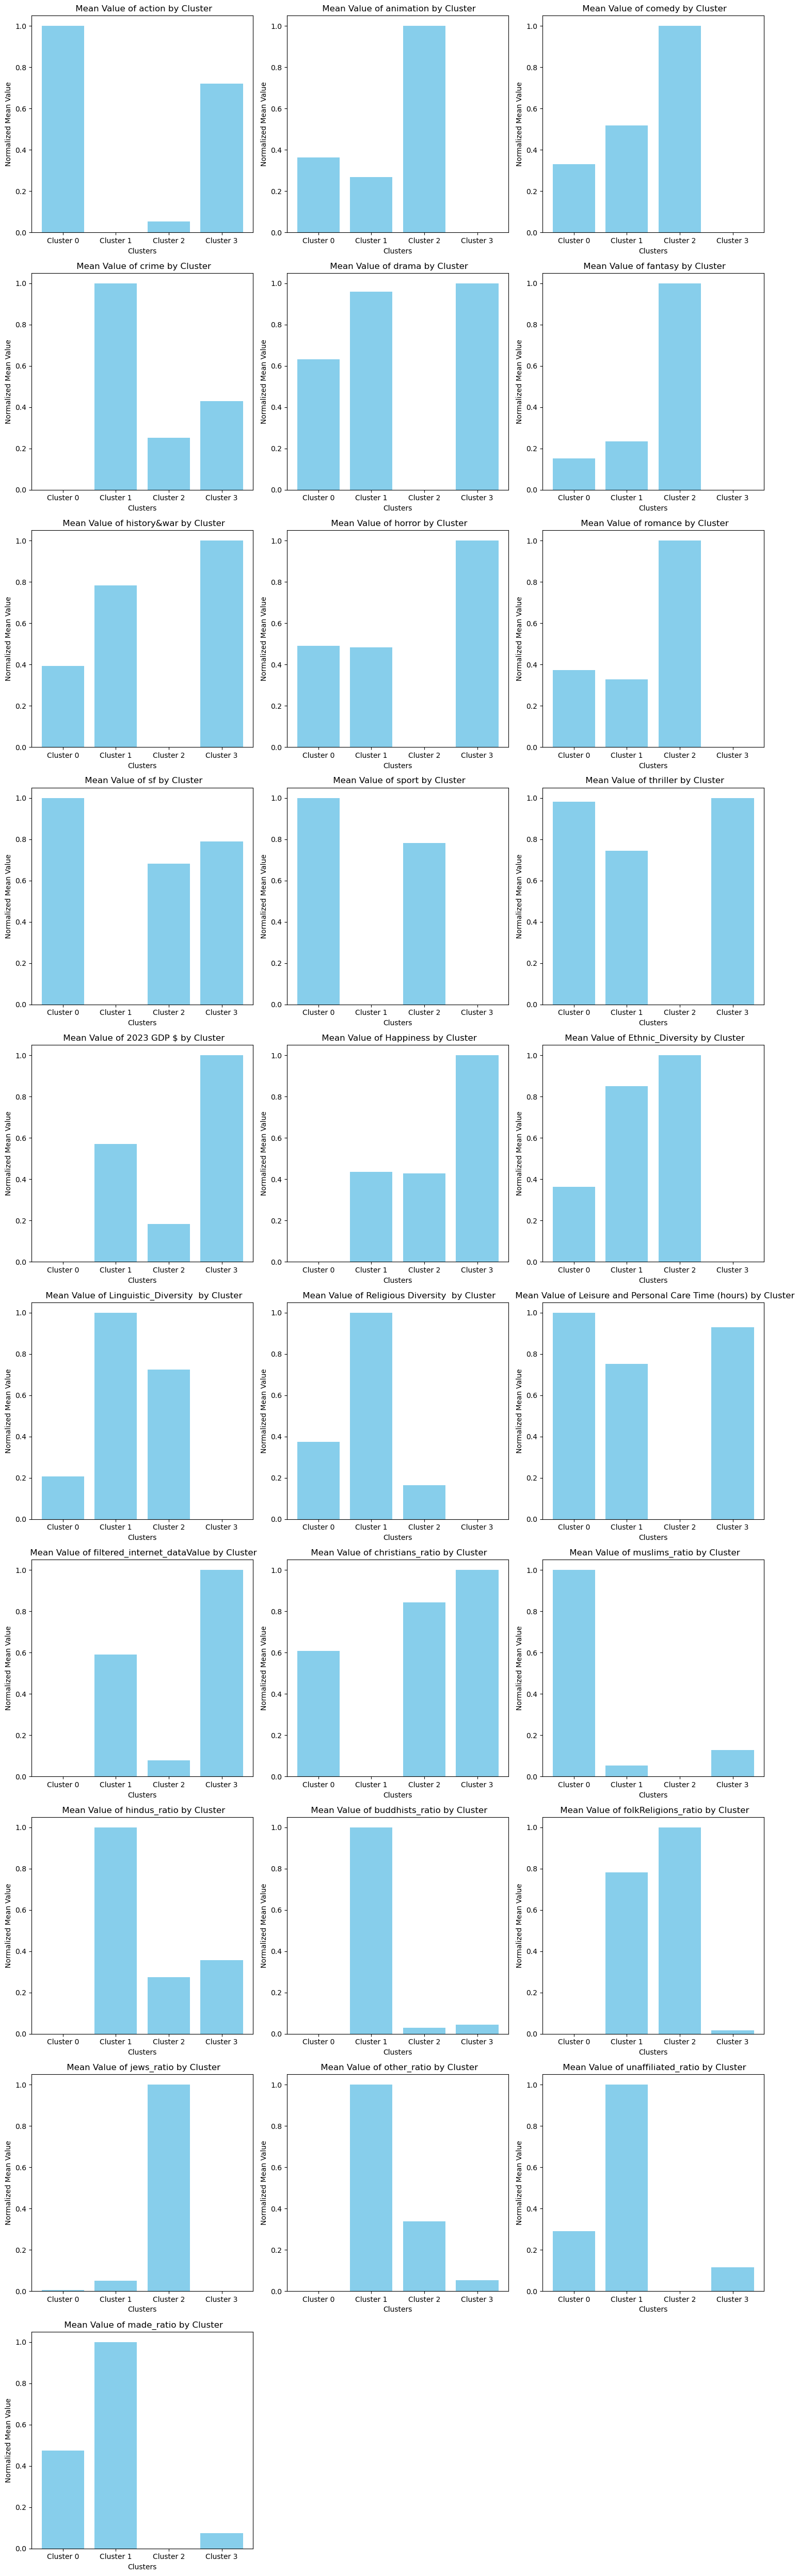

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터프레임 리스트
dataframes = [cluster_0_df, cluster_1_df, cluster_2_df, cluster_3_df]

# 드롭할 컬럼 이름 리스트
columns_to_exclude = ['Unnamed: 0', 'music & musical', 'documentary',
                       'Log GDP per capita', 'nation', 'Country', 'Official Language', 'Population']

# 드롭할 컬럼 제거 및 수치형 변수만 남기기
numeric_dfs = [df.drop(columns=columns_to_exclude, errors='ignore').select_dtypes(include='number') for df in dataframes]

# 평균값 계산
mean_values = [df.mean() for df in numeric_dfs]
mean_df = pd.DataFrame(mean_values, index=[f'Cluster {i}' for i in range(len(mean_values))])

# Min-Max 정규화
normalized_mean_df = (mean_df - mean_df.min()) / (mean_df.max() - mean_df.min())

# 서브플롯 설정
num_columns = normalized_mean_df.shape[1]
num_rows = int(np.ceil(num_columns / 3))  # 행 수 계산
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))

# 각 컬럼에 대해 서브플롯 생성
for i, column in enumerate(normalized_mean_df.columns):
    ax = axes[i // 3, i % 3]  # 행과 열 인덱스 계산
    ax.bar(normalized_mean_df.index, normalized_mean_df[column], color='skyblue')
    ax.set_title(f' Mean Value of {column} by Cluster')
    ax.set_xlabel('Clusters')
    ax.set_ylabel('Normalized Mean Value')
    ax.set_xticks(normalized_mean_df.index)
    ax.set_xticklabels(normalized_mean_df.index, rotation=0)

# 남은 서브플롯 비우기
for j in range(i + 1, num_rows * 3):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


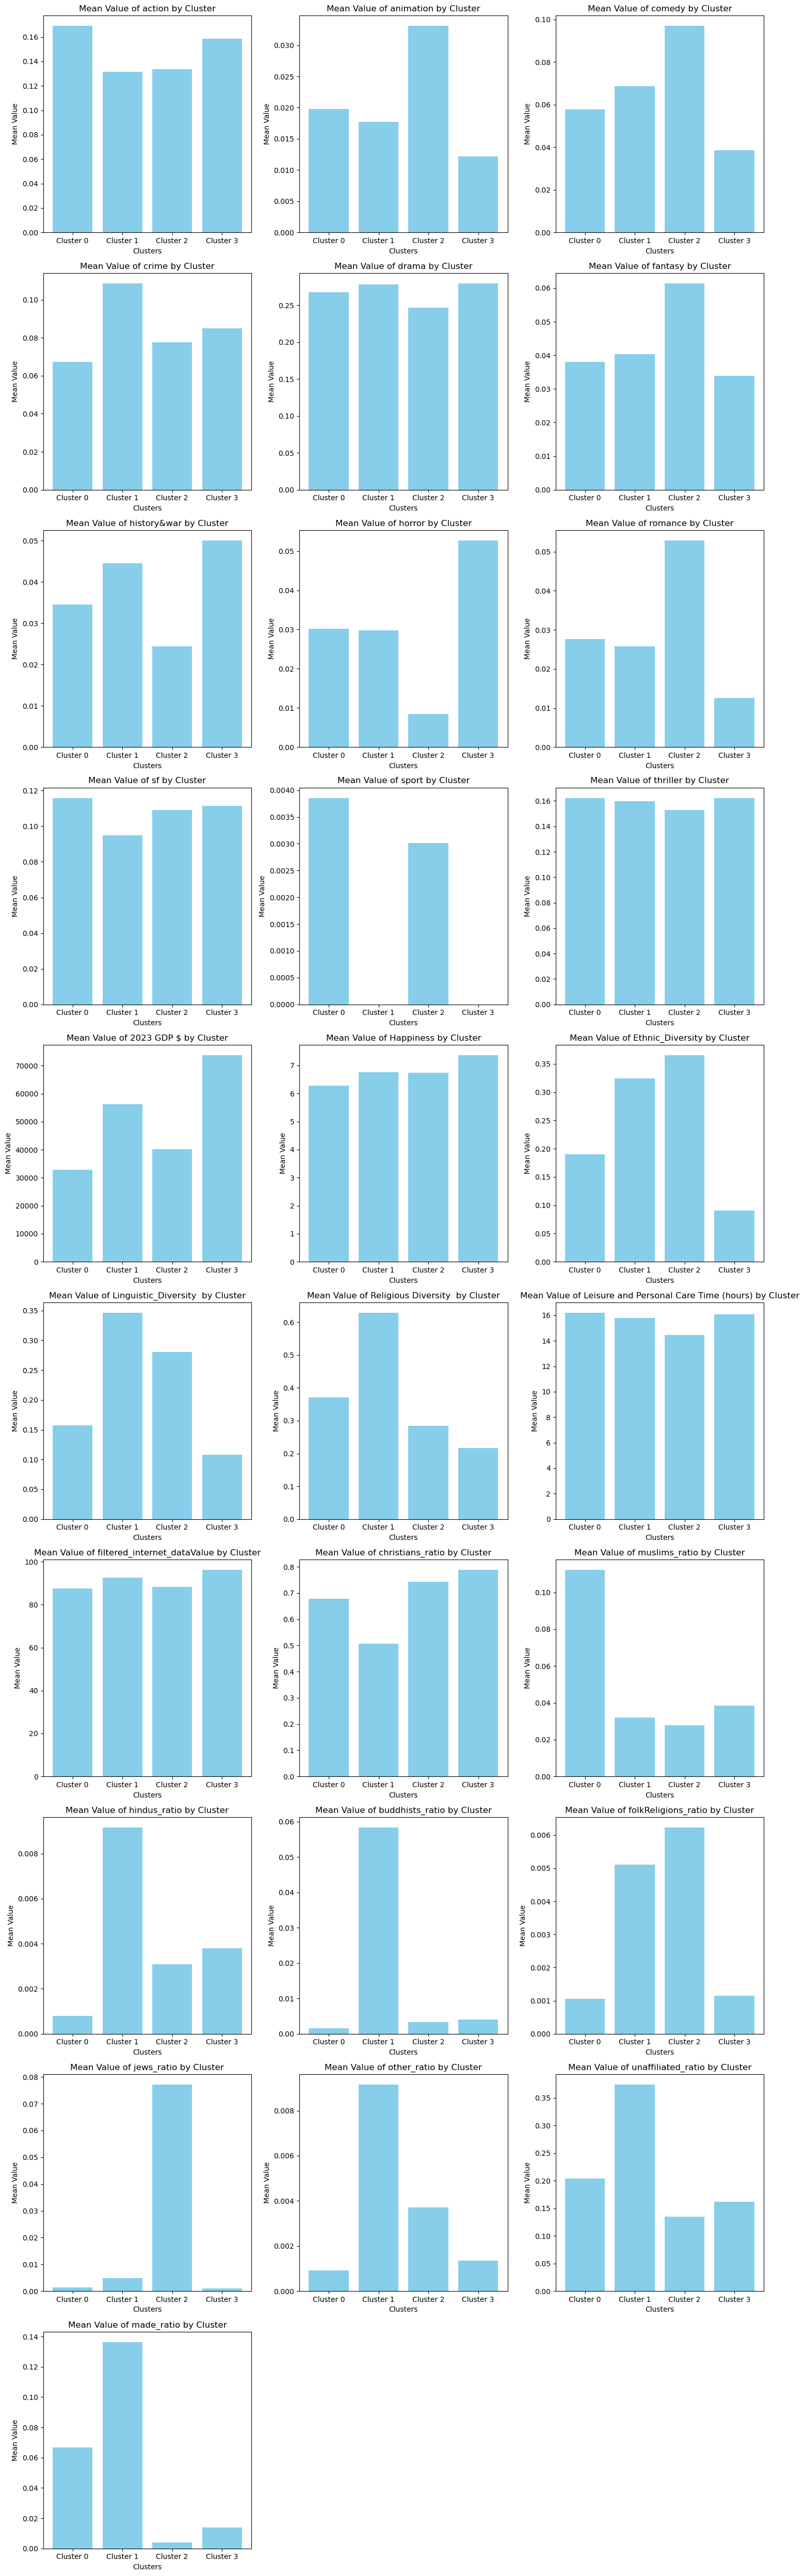

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터프레임 리스트
dataframes = [cluster_0_df, cluster_1_df, cluster_2_df, cluster_3_df]

# 드롭할 컬럼 이름 리스트
columns_to_exclude = ['Unnamed: 0', 'music & musical', 'documentary',
                       'Log GDP per capita', 'nation', 'Country', 'Official Language', 'Population']

# 드롭할 컬럼 제거 및 수치형 변수만 남기기
numeric_dfs = [df.drop(columns=columns_to_exclude, errors='ignore').select_dtypes(include='number') for df in dataframes]

# 평균값 계산
mean_values = [df.mean() for df in numeric_dfs]
mean_df = pd.DataFrame(mean_values, index=[f'Cluster {i}' for i in range(len(mean_values))])

# 서브플롯 설정
num_columns = mean_df.shape[1]
num_rows = int(np.ceil(num_columns / 3))  # 행 수 계산
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))

# 각 컬럼에 대해 서브플롯 생성
for i, column in enumerate(mean_df.columns):
    ax = axes[i // 3, i % 3]  # 행과 열 인덱스 계산
    ax.bar(mean_df.index, mean_df[column], color='skyblue')
    ax.set_title(f'Mean Value of {column} by Cluster')
    ax.set_xlabel('Clusters')
    ax.set_ylabel('Mean Value')
    ax.set_xticks(mean_df.index)
    ax.set_xticklabels(mean_df.index, rotation=0)

# 남은 서브플롯 비우기
for j in range(i + 1, num_rows * 3):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임 리스트 (예시로 클러스터 데이터프레임을 가정)
dataframes = [cluster_0_df, cluster_1_df, cluster_2_df, cluster_3_df]

# 드롭할 컬럼 이름 리스트
columns_to_exclude = ['Unnamed: 0', 'music & musical', 'documentary',
                       'Log GDP per capita', 'nation', 'Country', 'Official Language', 'Population']

# 드롭할 컬럼 제거 및 수치형 변수만 남기기
numeric_dfs = [df.drop(columns=columns_to_exclude, errors='ignore').select_dtypes(include='number') for df in dataframes]

# 평균값 계산
mean_values = [df.mean() for df in numeric_dfs]
mean_df = pd.DataFrame(mean_values, index=[f'Cluster {i}' for i in range(len(mean_values))])

# 각 컬럼별로 평균값이 가장 높은 클러스터 찾기
mean_clusters = mean_df.idxmax()

# mean_clusters를 데이터프레임으로 변환
mean_clusters_df = mean_clusters.reset_index()
mean_clusters_df.columns = ['Column', 'Highest Cluster']  # 컬럼 이름 변경

# 클러스터별로 컬럼 묶기
grouped_columns = mean_clusters_df.groupby('Highest Cluster')['Column'].apply(list).reset_index()

# 컬럼 이름 변경
grouped_columns.columns = ['Cluster', 'Columns']

grouped_columns

,Cluster,Columns
0,Cluster 0,"[action, sf, sport, Leisure and Personal Care Time (hours), muslims_ratio]"
1,Cluster 1,"[crime, Linguistic_Diversity , Religious Diversity , hindus_ratio, buddhists_ratio, other_ratio, unaffiliated_ratio, made_ratio]"
2,Cluster 2,"[animation, comedy, fantasy, romance, Ethnic_Diversity, folkReligions_ratio, jews_ratio]"
3,Cluster 3,"[drama, history&war, horror, thriller, 2023 GDP $, Happiness, filtered_internet_dataValue, christians_ratio]"


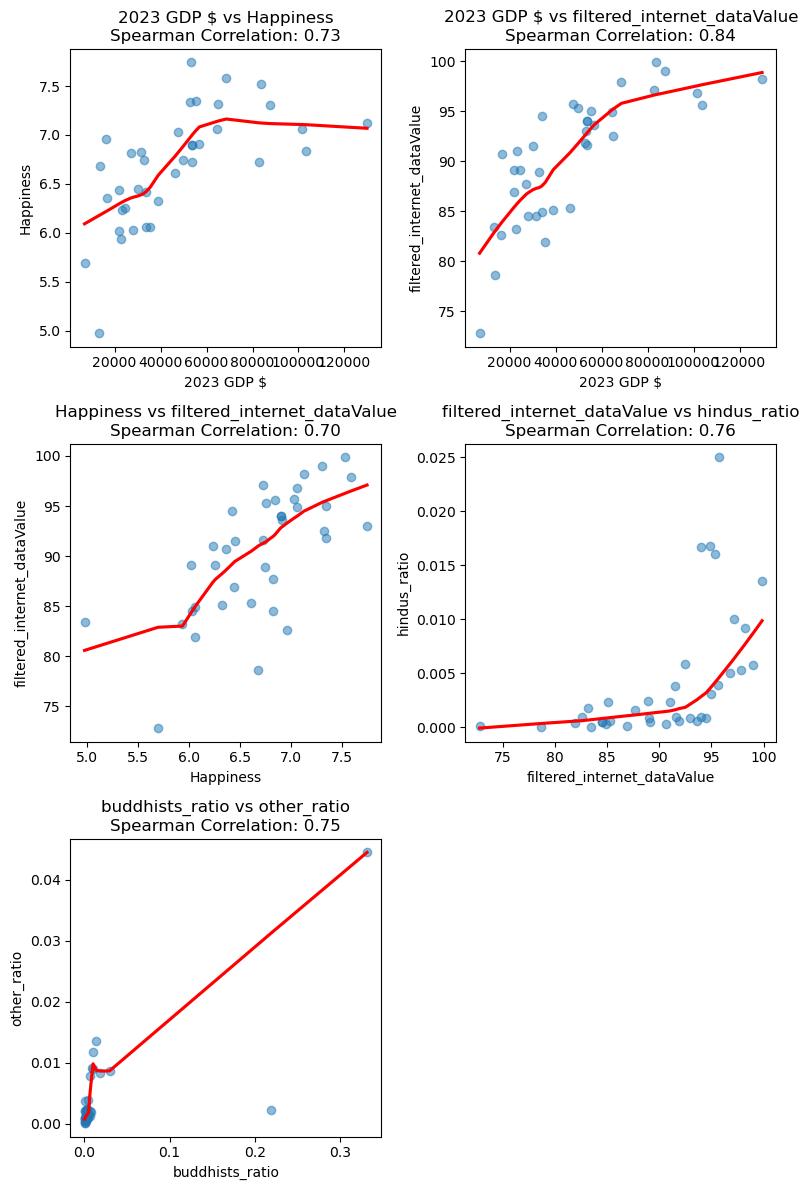

In [67]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 드롭할 컬럼 이름 리스트
columns_to_exclude = ['Unnamed: 0', 'music & musical', 'documentary',
                       'Log GDP per capita', 'nation', 'Country', 'Official Language', 'Population']

# 특정 컬럼을 제외한 데이터프레임 생성
filtered_df = data.drop(columns=columns_to_exclude)

# 스피어만 상관계수 계산
correlation_matrix = filtered_df.corr(method='spearman')

# 절댓값이 0.6 이상인 상관관계만 필터링
strong_correlations = correlation_matrix[(correlation_matrix.abs() >= 0.7) & (correlation_matrix != 1)]

# 유효한 상관관계 쌍을 리스트로 변환 (중복 및 같은 변수 제외)
correlation_pairs = [(col1, col2) for col1, col2 in strong_correlations.stack().index.tolist() if col1 < col2]

# 상관관계 쌍이 있는지 확인
if not correlation_pairs:
    print("상관관계 쌍이 없습니다.")
else:
    # 서브플롯 생성
    num_pairs = len(correlation_pairs)
    num_cols = 2  # 서브플롯의 열 수
    num_rows = (num_pairs + num_cols - 1) // num_cols  # 필요한 행 수 계산

    # figsize를 줄여서 시각화 크기 조정
    plt.figure(figsize=(8, 4 * num_rows))  # 가로를 줄이고 세로는 비율에 맞춰 조정
    for i, (col1, col2) in enumerate(correlation_pairs):
        plt.subplot(num_rows, num_cols, i + 1)
        # lowess 회귀선과 함께 산점도 그리기
        sns.regplot(data=filtered_df, x=col1, y=col2, scatter_kws={'alpha': 0.5}, 
                    line_kws={'color': 'red'}, lowess=True)
        
        # 상관계수 계산
        correlation_coefficient = filtered_df[col1].corr(filtered_df[col2], method='spearman')
        
        plt.title(f'{col1} vs {col2}\nSpearman Correlation: {correlation_coefficient:.2f}')
        plt.xlabel(col1)
        plt.ylabel(col2)

    plt.tight_layout()
    
    # 시각화를 파일로 저장
    plt.savefig('correlation_plots.png', dpi=300)  # dpi는 해상도 설정
    plt.show()


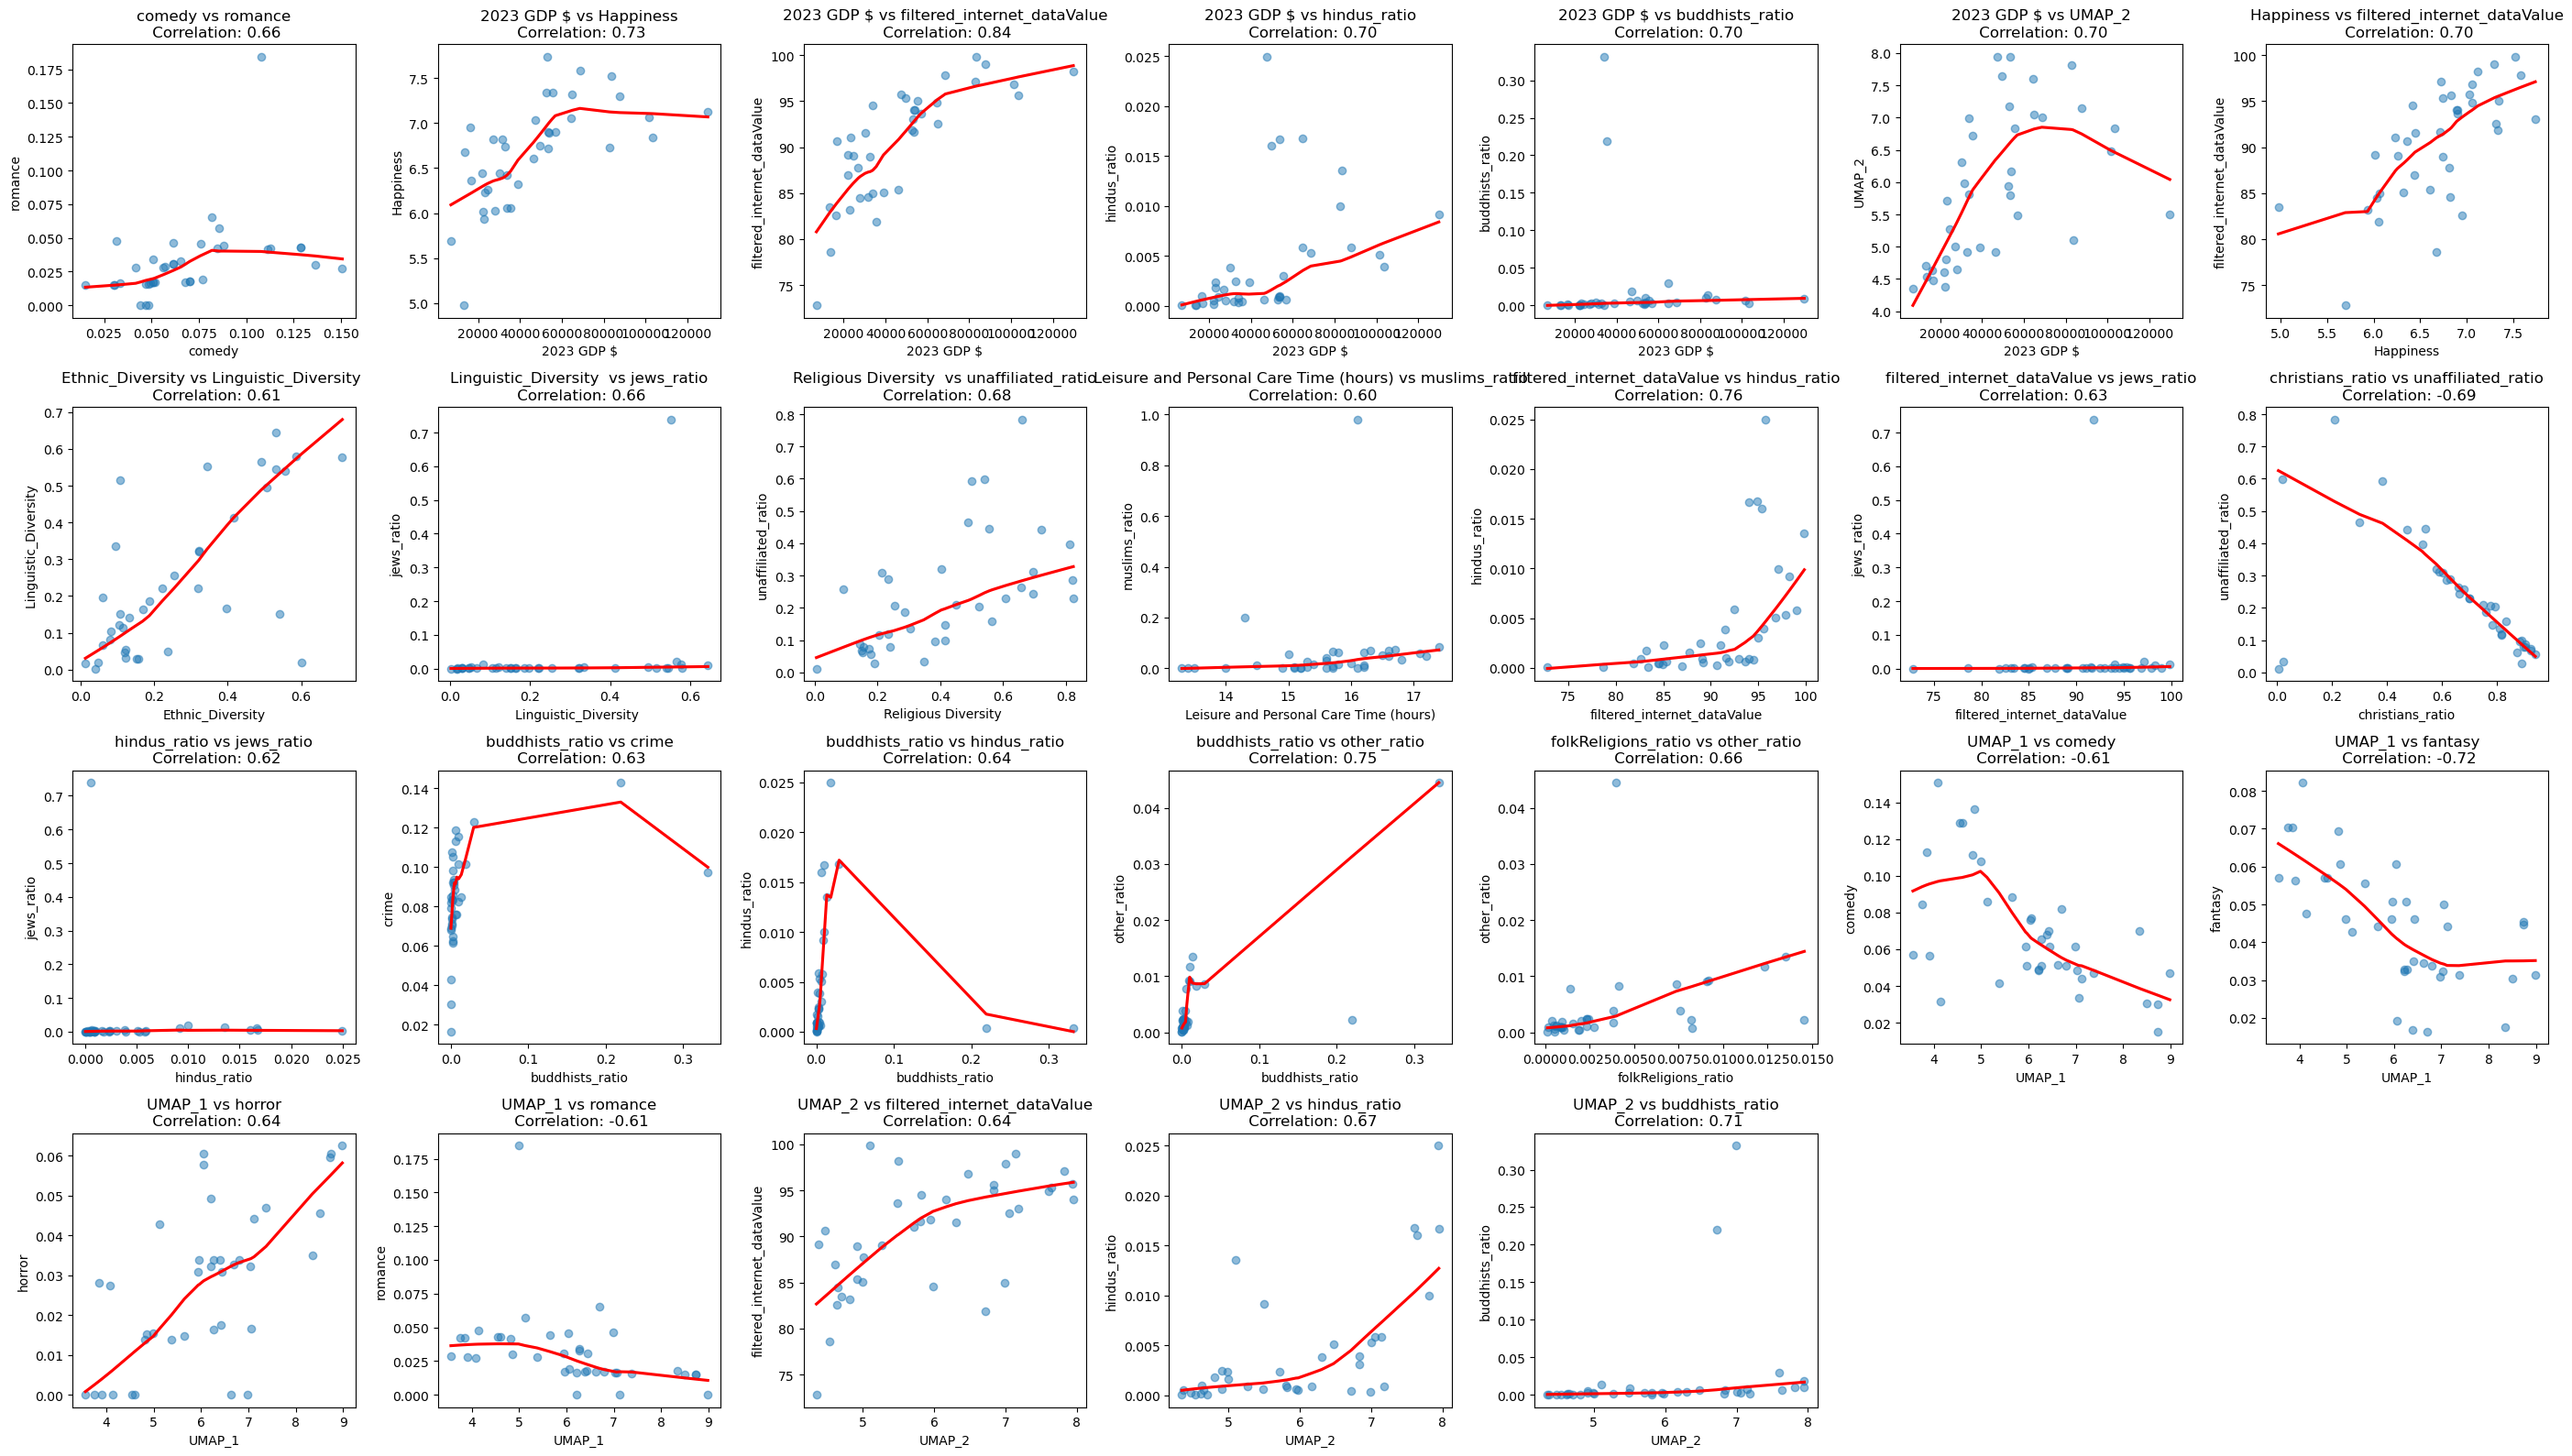

In [21]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 드롭할 컬럼 이름 리스트
columns_to_exclude = ['Unnamed: 0', 'music & musical', 'documentary',
                       'Log GDP per capita', 'nation', 'Country', 'Official Language', 'Population']

# 특정 컬럼을 제외한 데이터프레임 생성
filtered_df = data.drop(columns=columns_to_exclude)

# 스피어만 상관계수 계산
correlation_matrix = filtered_df.corr(method='spearman')

# 절댓값이 0.6 이상인 상관관계만 필터링
strong_correlations = correlation_matrix[(correlation_matrix.abs() >= 0.6) & (correlation_matrix != 1)]

# 유효한 상관관계 쌍을 리스트로 변환 (중복 및 같은 변수 제외)
correlation_pairs = [(col1, col2) for col1, col2 in strong_correlations.stack().index.tolist() if col1 < col2]

# 상관관계 쌍이 있는지 확인
if not correlation_pairs:
    print("상관관계 쌍이 없습니다.")
else:
    # 서브플롯 생성
    num_pairs = len(correlation_pairs)
    num_cols = 7 # 서브플롯의 열 수
    num_rows = (num_pairs + num_cols - 1) // num_cols  # 필요한 행 수 계산

    # figsize를 줄여서 시각화 크기 조정
    plt.figure(figsize=(28, 4 * num_rows))  # 가로를 줄이고 세로는 비율에 맞춰 조정
    for i, (col1, col2) in enumerate(correlation_pairs):
        plt.subplot(num_rows, num_cols, i + 1)
        # lowess 회귀선과 함께 산점도 그리기
        sns.regplot(data=filtered_df, x=col1, y=col2, scatter_kws={'alpha': 0.5}, 
                    line_kws={'color': 'red'}, lowess=True)
        
        # 상관계수 계산
        correlation_coefficient = filtered_df[col1].corr(filtered_df[col2], method='spearman')
        
        plt.title(f'{col1} vs {col2}\n Correlation: {correlation_coefficient:.2f}')
        plt.xlabel(col1)
        plt.ylabel(col2)

    plt.tight_layout()
    
    # 시각화를 파일로 저장
    plt.savefig('correlation_plots.png', dpi=300)  # dpi는 해상도 설정
    plt.show()
